In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("ER Wait Time Dataset.csv")
print("Broj redova i kolona:", df.shape)
print("Nazivi kolona:\n", df.columns.tolist())

Broj redova i kolona: (5000, 19)
Nazivi kolona:
 ['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Region', 'Visit Date', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level', 'Nurse-to-Patient Ratio', 'Specialist Availability', 'Facility Size (Beds)', 'Time to Registration (min)', 'Time to Triage (min)', 'Time to Medical Professional (min)', 'Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction']


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("-", "_")

In [4]:
df = df.dropna(subset=["total_wait_time_min", "day_of_week", "time_of_day"])

In [5]:
df.head(10)

,visit_id,patient_id,hospital_id,hospital_name,region,visit_date,day_of_week,season,time_of_day,urgency_level,nurse_to_patient_ratio,specialist_availability,facility_size_beds,time_to_registration_min,time_to_triage_min,time_to_medical_professional_min,total_wait_time_min,patient_outcome,patient_satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1
5,HOSP-5-20241120-0001,PAT-00006,HOSP-5,Summit Health Center,Urban,2024-11-20 22:34:08,Wednesday,Fall,Night,Medium,3,7,167,12,15,36,63,Discharged,3
6,HOSP-3-20240221-0003,PAT-00007,HOSP-3,Northside Community Hospital,Rural,2024-02-21 15:26:54,Wednesday,Winter,Late Morning,Medium,4,2,42,22,37,57,116,Admitted,1
7,HOSP-2-20241212-0002,PAT-00008,HOSP-2,Riverside Medical Center,Urban,2024-12-12 20:23:38,Thursday,Winter,Afternoon,Medium,3,2,84,8,25,48,81,Admitted,2
8,HOSP-1-20241129-0003,PAT-00009,HOSP-1,Springfield General Hospital,Urban,2024-11-29 02:47:33,Friday,Fall,Afternoon,Medium,4,3,87,16,27,35,78,Discharged,2
9,HOSP-1-20240727-0004,PAT-00010,HOSP-1,Springfield General Hospital,Urban,2024-07-27 22:01:14,Saturday,Summer,Afternoon,Critical,1,4,99,3,3,5,11,Admitted,5


In [6]:
numeric_cols = [
    "time_to_registration_min",
    "time_to_triage_min",
    "time_to_medical_professional_min",
    "total_wait_time_min"
]

In [7]:
print("\nDeskriptivna statistika:")
print(df[numeric_cols].describe())


Deskriptivna statistika:
       time_to_registration_min  time_to_triage_min  \
count               5000.000000         5000.000000   
mean                  11.704200           24.827000   
std                   10.437284           24.807994   
min                    0.000000            1.000000   
25%                    3.000000            6.000000   
50%                    8.000000           16.000000   
75%                   18.000000           36.000000   
max                   66.000000          163.000000   

       time_to_medical_professional_min  total_wait_time_min  
count                       5000.000000          5000.000000  
mean                          45.385400            81.916600  
std                           35.619975            68.084538  
min                            2.000000             4.000000  
25%                           17.000000            27.000000  
50%                           35.000000            60.000000  
75%                           66.0000


time_to_registration_min: D’Agostino p = 6.75547012204446e-193 (nije normalno)
time_to_registration_min: Shapiro-Wilk p = 1.5138497747831567e-20 (nije normalno)


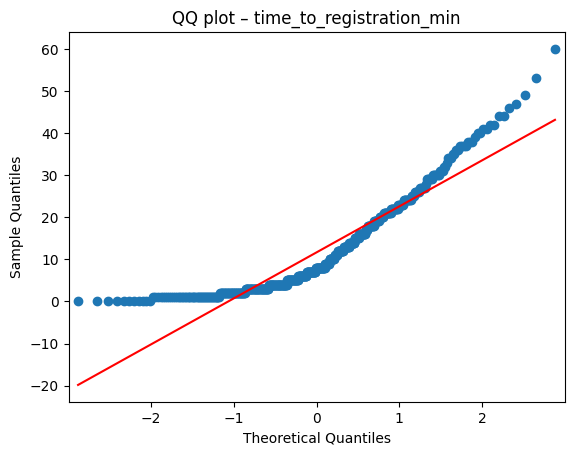

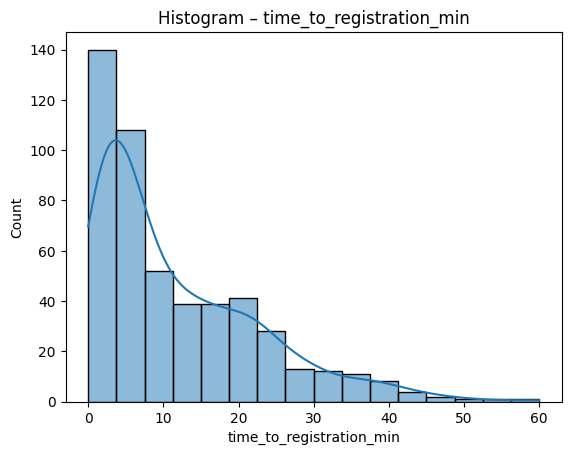


time_to_triage_min: D’Agostino p = 0.0 (nije normalno)
time_to_triage_min: Shapiro-Wilk p = 2.696285269006272e-24 (nije normalno)


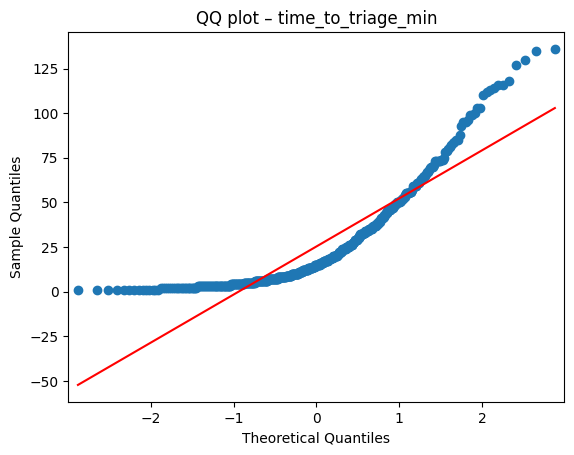

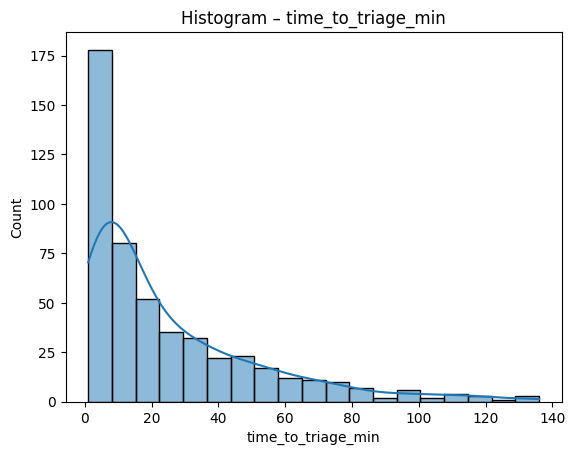


time_to_medical_professional_min: D’Agostino p = 2.5767344994083e-186 (nije normalno)
time_to_medical_professional_min: Shapiro-Wilk p = 3.7969159574782874e-20 (nije normalno)


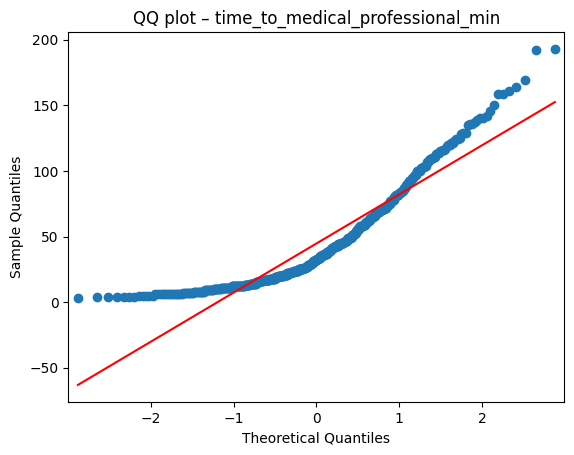

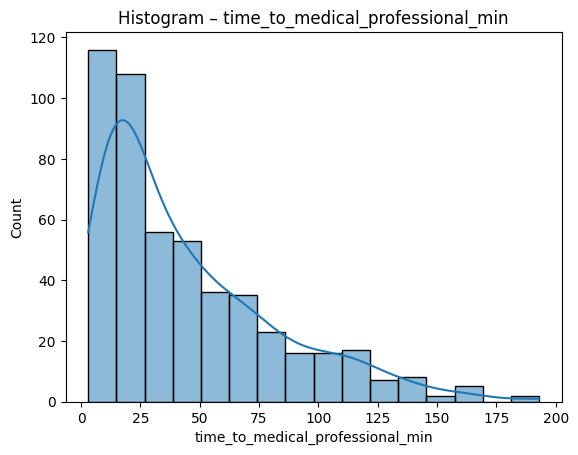


total_wait_time_min: D’Agostino p = 6.217647364569317e-194 (nije normalno)
total_wait_time_min: Shapiro-Wilk p = 4.478393384443345e-21 (nije normalno)


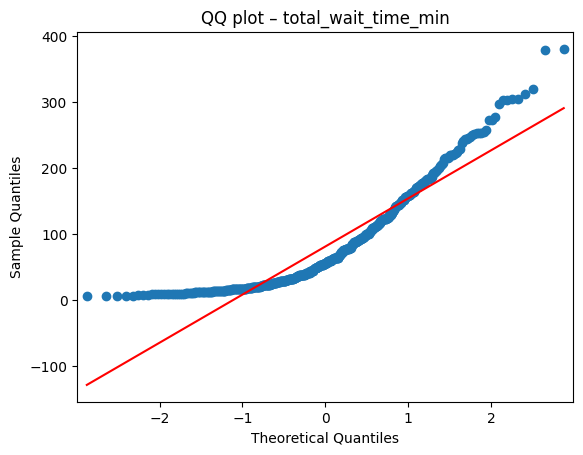

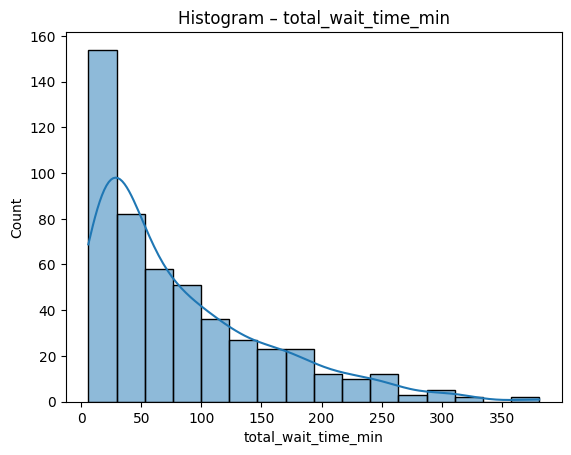

In [12]:
for col in numeric_cols:
    data = df[col].dropna()
    
    k2, p_dag = stats.normaltest(data)
    print(f"\n{col}: D’Agostino p = {p_dag} {'(nije normalno)' if p_dag < 0.05 else '(normalno)'}")

    sample = data.sample(min(500, len(data)), random_state=1)
    w, p_shapiro = stats.shapiro(sample)
    print(f"{col}: Shapiro-Wilk p = {p_shapiro} {'(nije normalno)' if p_shapiro < 0.05 else '(normalno)'}")

    sm.qqplot(sample, line="s")
    plt.title(f"QQ plot – {col}")
    plt.show()

    sns.histplot(sample, kde=True)
    plt.title(f"Histogram – {col}")
    plt.xlabel(col)
    plt.show()

In [9]:
grouped = df.groupby("day_of_week")["total_wait_time_min"].apply(list)
h_stat, p_kw = stats.kruskal(*grouped)
print(f"Kruskal-Wallis test po danima: H = {h_stat:.2f}, p = {p_kw}")

Kruskal-Wallis test po danima: H = 88.26, p = 6.956384752851775e-17


In [10]:
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])
g1 = df[df.is_weekend == False]["total_wait_time_min"]
g2 = df[df.is_weekend == True]["total_wait_time_min"]

u_stat, p_mw = stats.mannwhitneyu(g1, g2, alternative="two-sided")
print(f"Mann-Whitney U test (vikend vs radni): U = {u_stat}, p = {p_mw}")

Mann-Whitney U test (vikend vs radni): U = 2872870.5, p = 1.872610516067095e-12


In [11]:
corr, p_corr = stats.spearmanr(df["time_to_medical_professional_min"], df["total_wait_time_min"])
print(f"Spearman korelacija: ρ = {corr:.3f}, p = {p_corr}")

Spearman korelacija: ρ = 0.985, p = 0.0
